## Basic Image Processing Tasks

In [1]:
# Import libraries
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 7) # (w, h)
import numpy as np
import cv2 as cv

### Helper Functions

In [2]:
# Function to display images
def display(img, grayscale = False):
    plt.rcParams['figure.figsize'] = (7, 5)
    if grayscale == True:
       plt.imshow(img, cmap='gray')
       plt.show()
    else:
       plt.imshow(img)
       plt.show()

### Download images

In [10]:
!wget http://www.petmd.com/sites/default/files/01New_GoldenRetriever.jpeg -O dog.jpg
!wget https://educationbusinessuk.net/sites/default/files/slide_l.jpg -O playground.jpg

URL transformed to HTTPS due to an HSTS policy
--2021-03-20 11:13:50--  https://www.petmd.com/sites/default/files/01New_GoldenRetriever.jpeg
Resolving www.petmd.com (www.petmd.com)... 84.53.185.152, 84.53.185.105, 84.53.185.177, ...
Connecting to www.petmd.com (www.petmd.com)|84.53.185.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37909 (37K) [image/jpeg]
Saving to: ‘dog.jpg’

dog.jpg             100%[===================>]  37.02K  --.-KB/s    in 0.004s  

2021-03-20 11:13:50 (8.85 MB/s) - ‘dog.jpg’ saved [37909/37909]

--2021-03-20 11:13:50--  https://educationbusinessuk.net/sites/default/files/slide_l.jpg
Resolving educationbusinessuk.net (educationbusinessuk.net)... 213.171.212.78
Connecting to educationbusinessuk.net (educationbusinessuk.net)|213.171.212.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 570339 (557K) [image/jpeg]
Saving to: ‘playground.jpg’

playground.jpg      100%[===================>] 556.97K  --.-KB/s  

### Read and Write Images Using OpenCV

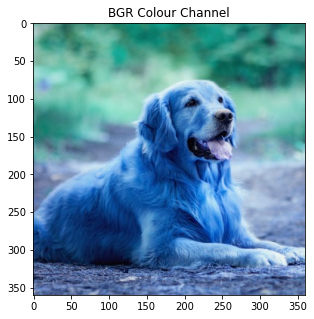

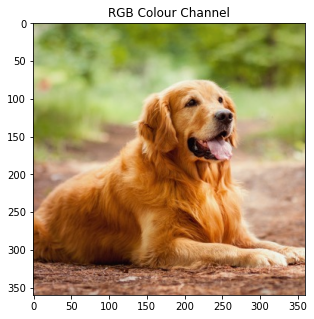

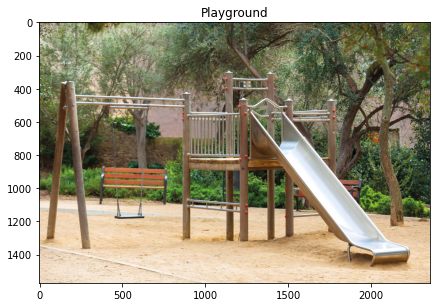

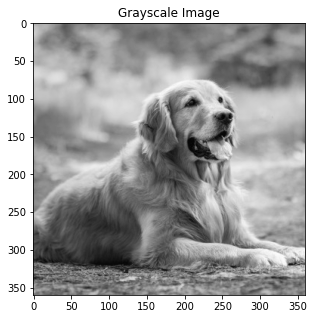

True

In [11]:
# Coloured Images
dog_bgr = cv.imread('dog.jpg', cv.IMREAD_COLOR)
plt.title('BGR Colour Channel')
display(dog_bgr)

# rgb images 
dog_rgb = cv.cvtColor(dog_bgr.copy(), cv.COLOR_BGR2RGB)
plt.title('RGB Colour Channel')
display(dog_rgb)

playground = cv.imread('playground.jpg', cv.IMREAD_COLOR)
playground = cv.cvtColor(playground, cv.COLOR_BGR2RGB)
plt.title('Playground')
display(playground)

# Grayscale Images
dog_gray = cv.cvtColor(dog_bgr.copy(), cv.COLOR_BGR2GRAY)
playground_gray = cv.cvtColor(playground.copy(), cv.COLOR_BGR2GRAY)
plt.title('Grayscale Image')
display(dog_gray, True)

# To save an image
cv.imwrite('dog_bgr.jpg', dog_bgr)

### Image arithmetic

**Addition:**  
$Output = Image1 + Image2$

**Subtraction:**  
$Output = Image1 - Image2$  
*Note:* $Image1 - Image2 != Image2 - Image1$

**Weighted sum:**  
$Output = \alpha Image1 + \beta Image2  + \gamma$

**Blending:**  
$Output = \alpha Image1 + (1 - \alpha )Image2 $

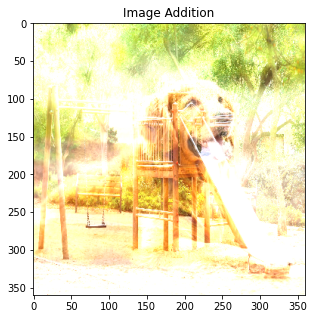

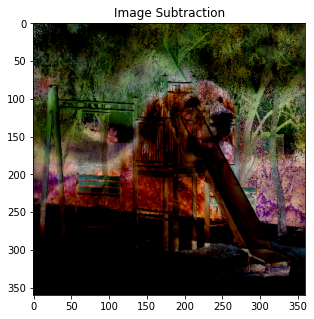

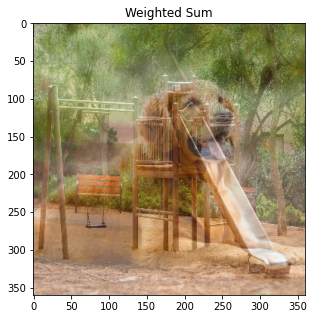

In [12]:
# Image Addition
image1 = dog_rgb

# Make both images the same size
image2 = cv.resize(playground.copy(), (image1.shape[1], image1.shape[0]))

add_images = cv.add(image1, image2)
plt.title('Image Addition')
display(add_images)

# Image Subtraction
subtract_images = cv.subtract(image1, image2)
plt.title('Image Subtraction')
display(subtract_images)

# Weighted Sum
weighted_sum = cv.addWeighted(image1, 0.5, image2, 0.5, 0)
plt.title('Weighted Sum')
display(weighted_sum)

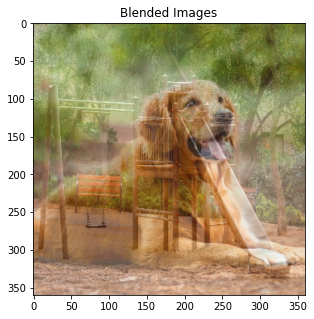

In [13]:
# Blended Images
#@title Blended Images {run: "auto" }

alpha = 0.6 #@param {type:"slider", min:0, max:1, step:0.01}
beta = 1 - alpha
# Gamma affects the brightness of the image
gamma = 0 #@param {type:"slider", min:0, max:255, step:1}

blended_images = cv.addWeighted(image1, alpha, image2, beta, gamma)
plt.title('Blended Images')
display(blended_images)